## Customer Segment Project

Here we will see 6 categories of products and we will identify which customer is intersetd in which category. So the distributor can do best in their services

In [129]:
import numpy as np
import pandas as pd
import visuals as vs
import IPython.display as display

%matplotlib inline

data_full = pd.read_csv('customers.csv')
data_full.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [130]:
# we have removed these features from the data as we don't need these fatires to create clusters
data_full.drop(['Region', 'Channel'], axis = 1, inplace = True)
data_full.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [131]:
data_full.shape

(440, 6)

In [132]:
# Look at the stats of Data
data_full.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [133]:
data = data_full

We will find few samples of our data and see what insight we can judge by using our intution and the data stats. We will take 3 samples and do some perception about the customer type:

In [134]:
# One simple way to do it
i = [47,138,359]
x = data.loc[i]
print(x)

     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
47   44466  54259    55571    7782             24171          6465
138  13537   4257     5034     155               249          3271
359    796   5878     2109     340               232           776


In [135]:
# Other Standard way is:
indices = [47,138,359]
samples = pd.DataFrame(data.loc[indices]).reset_index(drop = True)
print(samples)

   Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  44466  54259    55571    7782             24171          6465
1  13537   4257     5034     155               249          3271
2    796   5878     2109     340               232           776


So we can say:<br>
__Customer 1__: Can be a Grocery shop as he had buying everything and have higher purchase of Fresh Food.<br>
__customer 2__: Can be a restaurant or event organiser as it has buying mostly Fresh foods.<br>
__customer 3__: Can be a Dairy or Coffe/Tea Cafe as high purcahse in Milk Product.<br>
<br>
We will compare our intution with algorithm outputs

Lets see, If a customer buy one product. Will he buy the another one too. If yes, then how much?

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

feature_dropped = 'Detergents_Paper'
new_data = data.drop(feature_dropped, axis= 1)
labels = data[feature_dropped]

X_train, X_test, y_train, y_test = train_test_split(new_data, labels, test_size=0.25, random_state = 30)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

score = model.score(X_test, y_test)
print(score)

# Cal. r2_score also
from sklearn.metrics import r2_score
print('R2_score will be:', r2_score(y_test, y_pred))

0.5924811912848571
R2_score will be: 0.5924811912848571


We can see both r2_score and model.score output is same. And it is negative. We are getting negative value because we are losing relevant information after dropping that column.<br> This implies that 'Frozen' is not correlated to other and we cannot predict if a customers buys Fresh Foods also buy Frozens. 

Lets draw a scatter plot and prove our above solution true for all features. We will not have any correlation Frozen and all other features. Will see is there any correlations exists among other features.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BA68B46DA0>,
      dtype=object)

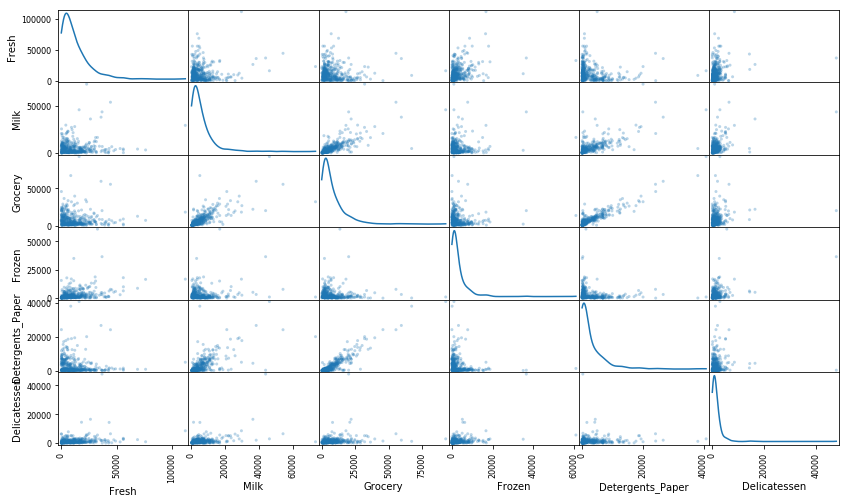

In [137]:
pd.scatter_matrix(data, alpha = 0.3, figsize=(14,8), diagonal ='kde')

In [138]:


feature_dropped_list = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
for feature_dropped in feature_dropped_list:
    new_data = data.drop(feature_dropped, axis= 1)
    labels = data[feature_dropped]

    X_train, X_test, y_train, y_test = train_test_split(new_data, labels, test_size=0.25, random_state = 30)

    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    score = model.score(X_test, y_test)
    print('Score of {0} is: {1}'.format(feature_dropped,score))


Score of Fresh is: -0.012319452657177266
Score of Milk is: 0.47452964423115784
Score of Grocery is: 0.4532781931948125
Score of Frozen is: -1.9053349151434733
Score of Detergents_Paper is: 0.6305806841070205
Score of Delicatessen is: 0.16599212452246181


So now we can see from graph and output. Fresh, Frozn, Delicatessen is not correlated.<br> And Grocery, Milk and Detergents_Papers are correlated.

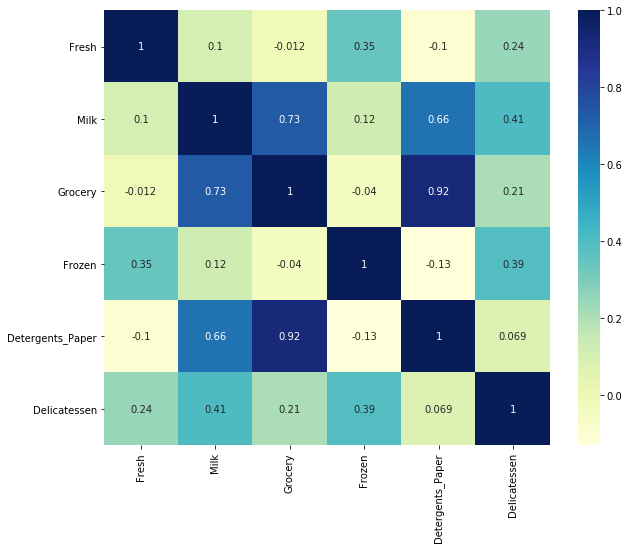

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True)
plt.show()

We can also see our data is highly skewed by using kde in our plots. 

Lets apply feature scaling as data in not normally distributed.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BA6AE00CF8>,
      dtype=object)

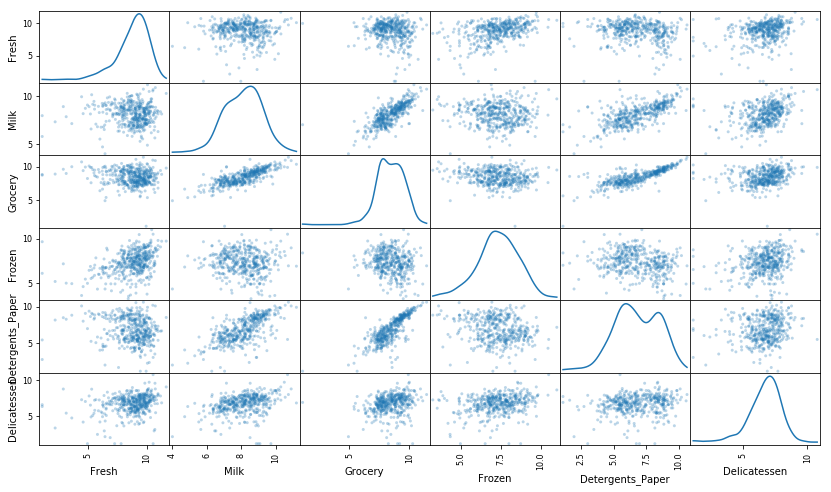

In [140]:
log_data = np.log(data)
pd.scatter_matrix(log_data, alpha = 0.3, figsize=(14,8), diagonal ='kde')

### Remove Outliers

In [141]:
for feature in log_data.keys():
    # Find 25th and 75th percentile of each feature
    Q1=np.percentile(log_data[feature], 25)
    Q3=np.percentile(log_data[feature], 75)
    
    # Find step
    step = (Q3-Q1) * 1.5
    
    # Display outliers
    print('Data as outliers for featire {} is :'.format(feature))
    #display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [65,66,75,128,154]
#outliers  = []
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
    

Data as outliers for featire Fresh is :


TypeError: 'module' object is not callable

In [142]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
   
    
    # Display the outliers
    print ("Data points considered outliers for the feature '{0}': {1}".format(feature,log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]))


Data points considered outliers for the feature 'Fresh':         Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.

In [143]:
# Find indexes of these outliers
import pprint as pp
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
   
    
    # Display the outliers
    print ("{0}: {1}".format(feature,log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index))


Fresh: Int64Index([65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355,
            357, 412],
           dtype='int64')
Milk: Int64Index([86, 98, 154, 356], dtype='int64')
Grocery: Int64Index([75, 154], dtype='int64')
Frozen: Int64Index([38, 57, 65, 145, 175, 264, 325, 420, 429, 439], dtype='int64')
Detergents_Paper: Int64Index([75, 161], dtype='int64')
Delicatessen: Int64Index([66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289,
            343],
           dtype='int64')


We have 42 unique indexes and 6 (65, 66, 75, 128, 154) are repeating in data. We can remove these repeating indexes as 9.5% of the data is outlier we cannot remove all for the sake of loss of information.

In [144]:
outliers= [65, 66, 75, 128, 154]
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)


Now we apply PCA fpr feature Transformation to find the combination of fetaures which best describes customers

Total variance for 1st 2 componenets:  0.7068172308068138
Total variance for 1st 4 componenets:  0.9310901099509613


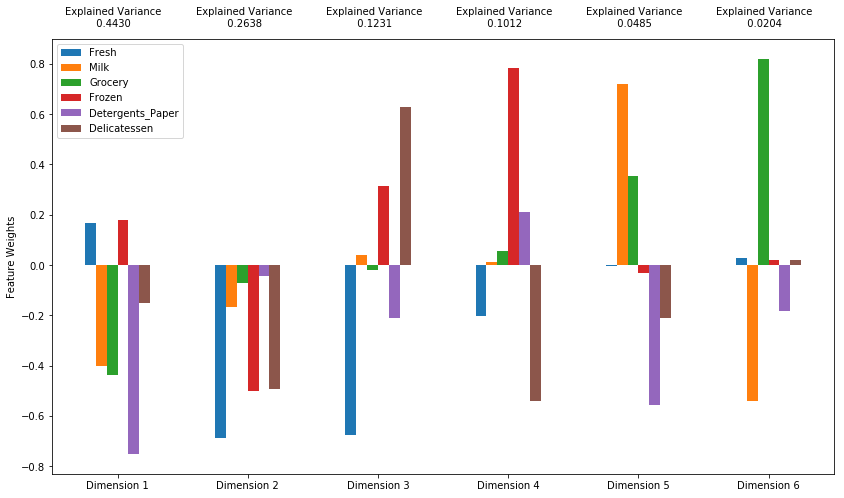

In [176]:
#log_samples = np.log(samples)

from sklearn.decomposition import PCA
pca = PCA(n_components = len(good_data.columns)).fit(good_data)

explained_var = pca.explained_variance_ratio_

explained_var2 = sum([explained_var[i] for i in range(2)])
explained_var4 = sum([explained_var[i] for i in range(4)])

print('Total variance for 1st 2 componenets: ', explained_var2)
print('Total variance for 1st 4 componenets: ', explained_var4)

pca_results = vs.pca_results(good_data, pca)

First, it is good to remember that the weight absolute values for each feature within the dimensions are important information. The negative sign only shows us that the positive direction of the PC dimension is opposite to te positive direction of the feature axis.

__Dimension 1__

As we can see above, the first PC has the following three major features: Detergents_Paper, Grocery and Milk. This confirms what we found out on previous analysis (Question 3), because the pairs of features with high correlation are Grocery/Milk, Detergents_Paper/Milk, Detergents_Paper/Grocery. We can think about these relationships as the following:

>The Milk feature can be predicted in a high degree of linearity using the Grocery feature, or vice-versa.

>The Grocery feature can be predicted in a high degree of linearity using the Detergents_Paper feature, or vice-versa.

>So, the Milk feature can be predicted in a high degree of linearity using the Detergents_Paper feature.

All of the previous sentences are translated to us by the first PC of the result by the bars with negative values. These values mean that a increase in the first PC will generate a decrease in these 3 features (the original feature space).

Another point here is that this Dimension can be thought of as a degree of freedom for separating the customers which differ from these 3 features (spend in Detergents_Paper, Grocery and Milk) by a substantial amount of spendings. For example, this dimension could separate a big retail market from a cafe. Obs: it is good to remember that this dimension is also influenced by other features with a lower weight.

__Dimension 2__

The major features within this dimension are Fresh, Frozen and Delicatessen. We didn't see the correlations between these features because their impact on the data distribution is much smaller, as the variance explained by this dimension is 0.2638.

This dimension can separate customers like restaurants from markets which don't need frozen and fresh products.

__Dimension 3__

Here, the major features are Fresh and Delicatessen. So, this dimension can also help separating specific types of restaurants and markets.

__Dimension 4__

Here, the major features are Frozen and Delicatessen. So, this dimension can also help separating specific types of restaurants and markets.

In [146]:
pca.components_

array([[ 0.16746374, -0.40143866, -0.43811142,  0.17820975, -0.75142613,
        -0.14987105],
       [-0.68593522, -0.16722783, -0.07072902, -0.50054207, -0.04244398,
        -0.49414702],
       [-0.67738927,  0.04020501, -0.01953317,  0.31504299, -0.21170161,
         0.62855082],
       [-0.204293  ,  0.01281068,  0.05567564,  0.78544905,  0.20961368,
        -0.54233972],
       [-0.00261356,  0.71923846,  0.3553861 , -0.0330861 , -0.55815441,
        -0.20918629],
       [ 0.02915623, -0.54018269,  0.82053348,  0.02054106, -0.18238824,
         0.01974794]])

In [147]:
print('Samples:\n', samples)
print('******************************************************************')
log_samples = np.log(samples)
print('log samples output:\n',log_samples)
print('******************************************************************')
pca_samples = pca.transform(log_samples)
pca_samples = pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values)
print('pca smaples output:\n', pca_samples)

Samples:
    Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  44466  54259    55571    7782             24171          6465
1  13537   4257     5034     155               249          3271
2    796   5878     2109     340               232           776
******************************************************************
log samples output:
        Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
0  10.702480  10.901524  10.925417  8.959569         10.092909      8.774158
1   9.513182   8.356320   8.523970  5.043425          5.517453      8.092851
2   6.679599   8.678972   7.653969  5.828946          5.446737      6.654153
******************************************************************
pca smaples output:
    Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0      -4.3646      -3.9519      -0.1229       0.6240       0.5379   
1       0.3525      -0.0495      -0.0661      -2.9649       0.6829   
2       0.5383       2.2224       1.

Lets reduce the dimensions using PCA to 2

In [163]:
pca = PCA(n_components=2).fit(good_data)
reduced_data = pca.transform(good_data)
pca_samples_2 = pca.transform(log_samples)
reduced_data = pd.DataFrame(np.round(reduced_data, 4), columns = ['Dimension 1', 'Dimension 2'])


print('Samples:\n', samples)
print('******************************************************************')
print('log samples output:\n',log_samples)
print('******************************************************************')
print('pca smaples output:\n', pca_samples)
print('******************************************************************')
pca_samples = pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2'])
print('pca Smaples in 2D:\n', pca_samples_2)


Samples:
    Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  44466  54259    55571    7782             24171          6465
1  13537   4257     5034     155               249          3271
2    796   5878     2109     340               232           776
******************************************************************
log samples output:
        Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
0  10.702480  10.901524  10.925417  8.959569         10.092909      8.774158
1   9.513182   8.356320   8.523970  5.043425          5.517453      8.092851
2   6.679599   8.678972   7.653969  5.828946          5.446737      6.654153
******************************************************************
pca smaples output:
    Dimension 1  Dimension 2
0      -4.3646      -3.9519
1       0.3525      -0.0495
2       0.5383       2.2224
******************************************************************
pca Smaples in 2D:
 [[-4.3645541  -3.95185523]
 [ 0.35245656 -0.049

Our sample data shows that the 1st 2 components are remain unchanged after transforming data on PCA.

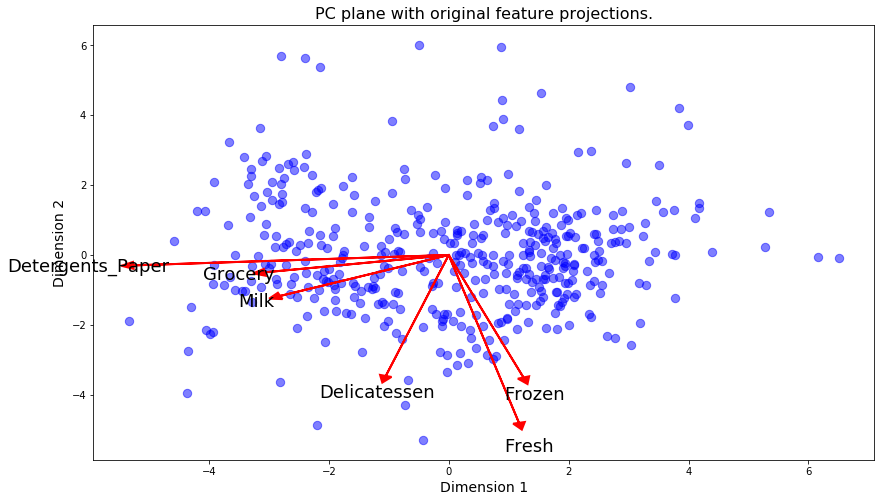

In [164]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

We can clearly find from above biplot that:
1. Dimension 1 has more correlation to Milk, Grocery, Detergents_papers 
2. Dimension 2 has more correlation on other 3

### Create Clusters

In [169]:
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

cluster = GMM(n_components = 2).fit(reduced_data)
pred=cluster.predict(reduced_data)

centers = cluster.means_

samples_pred = cluster.predict(pca_samples)

print(silhouette_score(reduced_data, pred))
pca_samples = pca_samples_2


0.4118195294464362


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Fun

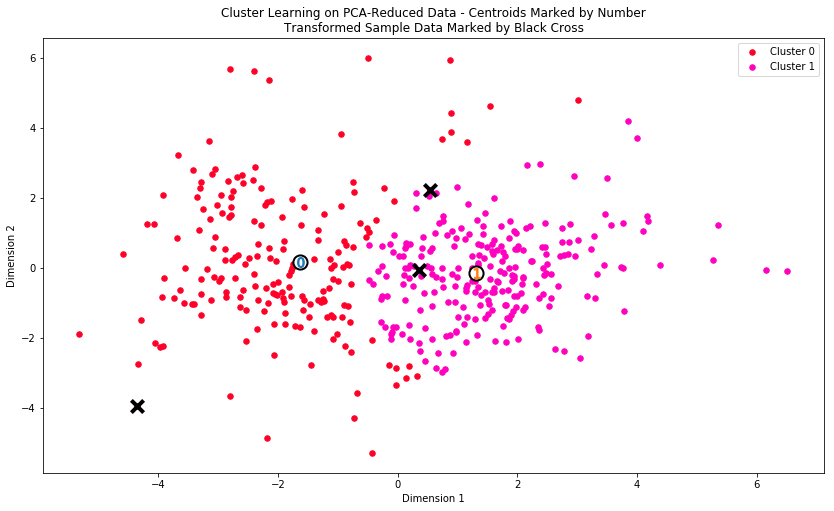

In [170]:
vs.cluster_results(reduced_data, pred, centers, pca_samples)

Data recovery:

In [174]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
true_centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4316.0,6347.0,9555.0,1036.0,3046.0,945.0
Segment 1,8812.0,2052.0,2689.0,2058.0,337.0,712.0


Cluster 0: can be a __Grocery__ shop as higher purchase of everythings. <br>
Cluster 1: can be __restaurant__ as good purchase of Milk, Grocery, and more of Fresh foods.

In [172]:
for i, pred in enumerate(samples_pred):
    print('Sample {0} is predicted to be in {1} cluster'.format(i,pred))

Sample 0 is predicted to be in 0 cluster
Sample 1 is predicted to be in 1 cluster
Sample 2 is predicted to be in 1 cluster


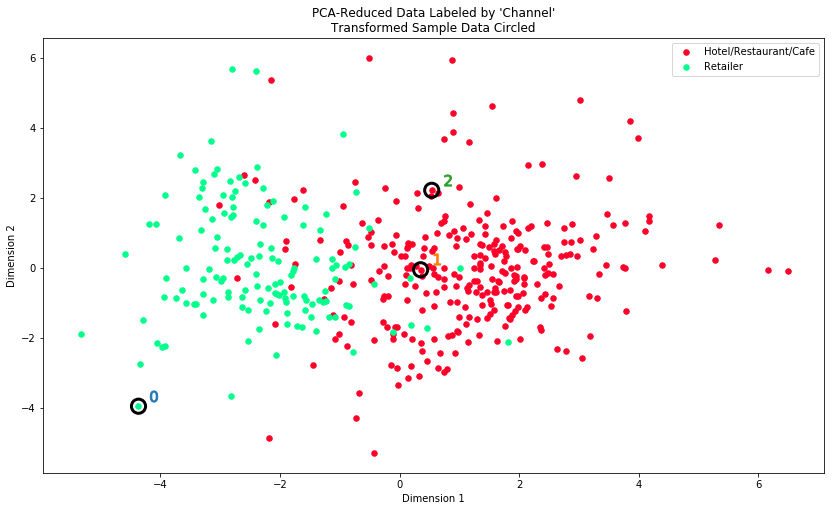

In [175]:
vs.channel_results(reduced_data, outliers, pca_samples)